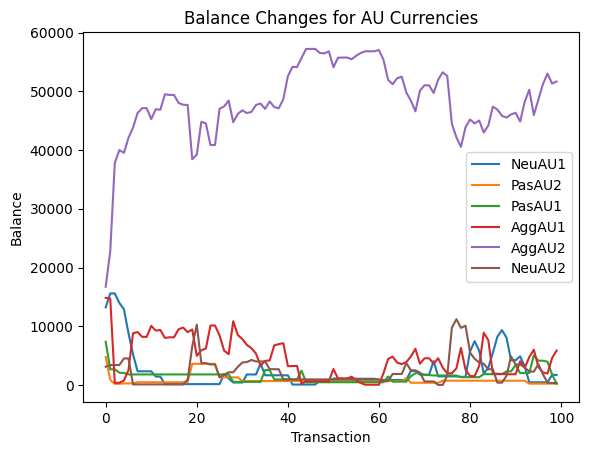

In [10]:
import matplotlib.pyplot as plt
import json

# Read JSON data from file
with open('zeroAndOut.json') as file:
    json_data = file.read()

# Parse JSON data
data = json.loads(json_data)

# Extract AU currencies
currencies = list(data['balances']['0']['balanceBefore'].keys())

# Initialize a dictionary to store balance data for each currency
balance_data = {currency: [] for currency in currencies}

# Extract balance changes
transactions = data['balances']

last_non_null_balance_after = None

for i in range(len(transactions)):
    if transactions[str(i)] is None:
        if last_non_null_balance_after is not None:
            for currency in currencies:
                balance_data[currency].append(last_non_null_balance_after[currency])
    else:
        balance_after = transactions[str(i)]['balanceAfter']
        for currency in currencies:
            balance_data[currency].append(balance_after[currency])
        last_non_null_balance_after = balance_after

# Prepare data for plotting
x = list(range(len(transactions)))
y = list(balance_data.values())
labels = list(balance_data.keys())

# Plot graph for each currency
for i in range(len(currencies)):
    plt.plot(x, y[i], label=labels[i])

plt.xlabel('Transaction')
plt.ylabel('Balance')
plt.title('Balance Changes for AU Currencies')
plt.legend()

# Save the graph as an image
plt.savefig('zeroAndOut.png')
plt.show()